## WEB SCRAPING

<img src="https://static.javatpoint.com/python/images/web-scraping-using-python.png" width=800>


### A Guide to Ethical Web Scraping
https://www.empiricaldata.org/dataladyblog/a-guide-to-ethical-web-scraping


### HTML Guide ###
Since we will be scraping from the web, you need to know HTML (HyperText Markup Language). [Introduction and tutorials of HTML](https://developer.mozilla.org/en-US/docs/Web/HTML)

### Use the appropriate web browser
Use Chrome or Firefox to inspect the HTML elements in the web page

## Q1: Read the [Guide to Ethical Web Scraping](https://www.empiricaldata.org/dataladyblog/a-guide-to-ethical-web-scraping) article and write a short paragraph to summarize the key messages about ethical web scraping.

Answer here:

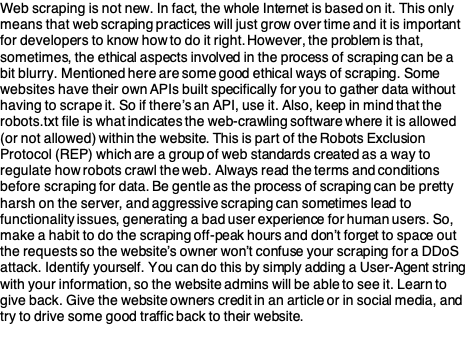

## Q2: Scape data from this [website](https://www.sjsu.edu/people/wendy.lee/docs/CS185C02-Sp21/table.html), create a dataframe to store the data, and write the data to a csv file.
- This website contains a table that lists the books, the authors, the quantity, and the prices. 
- The dataframe should contain three columns: `Title`, `Author`, and `Unit_Price`.
- The `Unit_Price` column should store the price for one book.
- Save the data in the dataframe in a csv file, `books.csv`. 

In [ ]:
# Your code here . . .
import pandas as pd
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup as bs
import numpy as np

url = "https://www.sjsu.edu/people/wendy.lee/docs/CS185C02-Sp21/table.html"
mockheaders = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_0_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
r = requests.get(url, headers = mockheaders)
html_soup = bs(r.text,'html.parser')
table = html_soup.find('table')
#print(table)

For getting array of authors


In [ ]:
authors = []
span = table('span')
for s in span:
  authors.append(s.contents[0])
authors.pop(2)
authors = [author.replace('by ', '') for author in authors]
print(authors)

['Delia Owens', 'Stephenie Meyer', 'Bruce Lawson & Remy Sharp', 'Celeste Ng']


For getting array of book titles

In [ ]:
Title = []
strong = table('strong')
for s in strong:
  Title.append(s.contents[0])
print(Title)

['Where the Crawdads Sing', 'Midnight Sun', 'Introducing HTML5', 'Little Fires Everywhere']


For getting Unit price

In [ ]:
Price = table.find_all('td',{'class':'item-price'})
TotalPrice = []
prices = []
for i in Price:
  prices.append(i.contents[0])
TotalPrice = [s.replace('$','') for s in prices]
TotalPrice = [float(x) for x in TotalPrice]
print(TotalPrice)


Qty = table.find_all('td',{'class':'item-qty'})
Quantity = []
for q in Qty:
  Quantity.append(q.text)
Quantity = [float(x) for x in Quantity]
print(Quantity)

UnitPrice = np.divide(TotalPrice,Quantity)
UnitPrice = list(UnitPrice)
print(UnitPrice)

[11.0, 26.64, 22.23, 10.2]
[1.0, 2.0, 1.0, 1.0]
[11.0, 13.32, 22.23, 10.2]


Creating the data frame

In [ ]:
data = {'Title':Title,'Author':authors,'Unit Price':UnitPrice}
df = pd.DataFrame(data)
df.index += 1
df['Unit Price'] = '$' + df['Unit Price'].astype(str)
# Write to csv file
f = open("books.csv", 'w')
df.to_csv(f)
f.close()
df

,Title,Author,Unit Price
1,Where the Crawdads Sing,Delia Owens,$11.0
2,Midnight Sun,Stephenie Meyer,$13.32
3,Introducing HTML5,Bruce Lawson & Remy Sharp,$22.23
4,Little Fires Everywhere,Celeste Ng,$10.2
